In [1]:

#Student: Alexandra Mavrofoti, date of the DPrepHDip_CA1 submitted: 2/4/2024




# import the pandas the library
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
sns.set()

# Import thi slibrary to suppress the warnings
import warnings
warnings.filterwarnings('ignore')

# import the file for the student data
df_student = pd.read_csv('student_data.csv')



Getting information about headers, observations, features and their mean etc.



In [2]:
df_student.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
df_student.describe()

,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4423.000000,4424.000000,...,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4423.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,18.669078,1.727848,8856.458738,0.890823,4.577758,132.613314,1.873192,19.561935,22.271987,10.960895,...,0.137658,0.541817,6.231743,8.063291,4.435805,10.229941,0.150316,11.566139,1.228029,0.001969
std,17.484682,1.313793,2063.763479,0.311897,10.216592,13.188332,6.914514,15.603186,15.343244,26.418253,...,0.690880,1.918546,2.196038,3.947951,3.014764,5.211367,0.753774,2.663850,1.382711,2.269935
min,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,4.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,5.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,9.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,194.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


In [62]:
df_student.shape

(4424, 37)



We can see in the above output that we have 4424 observations and 37 variables



In [5]:
df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   object 
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4423 non-null   float64
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   



Here we check how many of the observations have no values



In [6]:
df_student.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            1
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            1
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   1
Displaced                                         0
Educational special needs                         0
Debtor                                            1
Tuition fees up to date                           1
Gender                                            0
Scholarship holder                                0
Age at enrol



We have to clean the data. We check and drop the observations that have the below attributes. A second way would be to flag data



In [7]:
missing_value_formats=["n.a.","NA", "?", "n/a", "--", " ", "", "UnKnown", "Na", "NaN", "unknown"]

df_student=pd.read_csv("student_data.csv", na_values=missing_value_formats)

In [8]:
df_student.isnull().sum()

Marital status                                    1
Application mode                                  0
Application order                                 0
Course                                            1
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            1
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   1
Displaced                                         1
Educational special needs                         0
Debtor                                            1
Tuition fees up to date                           2
Gender                                            0
Scholarship holder                                0
Age at enrol



Drop any missing values (for rows or observatiosn here axis=0)



In [9]:
new_df_student=df_student.dropna(axis=0)

new_df_student

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,17,5,171.0,1,1,122.0,1,19,12.0,...,0,0.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,15,1,9254.0,1,1,160.0,1,1,3.0,...,0,6.0,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,9070.0,1,1,122.0,1,37,37.0,...,0,6.0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,17,2,9773.0,1,1,122.0,1,38,37.0,...,0,6.0,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,39,1,8014.0,0,1,100.0,1,37,38.0,...,0,6.0,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1.0,1,6,9773.0,1,1,125.0,1,1,1.0,...,0,6.0,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1.0,1,2,9773.0,1,1,120.0,105,1,1.0,...,0,6.0,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1.0,1,1,9500.0,1,1,154.0,1,37,37.0,...,0,8.0,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1.0,1,1,9147.0,1,1,180.0,1,37,37.0,...,0,5.0,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate




We double check all observations have valid data and see that observations have been reduced



In [10]:
new_df_student.isnull().values.any()

False



Also double check manually all their unique data



In [11]:
new_df_student=df_student.dropna(axis=1)

In [12]:
new_df_student["Application mode"].unique()

array([17, 15,  1, 39, 18, 53, 44, 51, 43,  7, 42, 16,  5,  2, 10, 57, 26,
       27], dtype=int64)

In [13]:
new_df_student["Application order"].unique()


array([5, 1, 2, 4, 3, 6, 9, 0], dtype=int64)

In [14]:
new_df_student["Daytime/evening attendance"].unique()

array([1, 0], dtype=int64)

In [15]:
new_df_student["Previous qualification"].unique()

array([ 1, 19, 42, 39, 10,  3, 40,  2,  4, 12, 43, 15,  6,  9, 38,  5, 14],
      dtype=int64)

In [16]:
new_df_student["Previous qualification (grade)"].unique()


array([122. , 160. , 100. , 133.1, 142. , 119. , 137. , 138. , 139. ,
       136. , 133. , 110. , 149. , 127. , 135. , 140. , 125. , 126. ,
       151. , 115. , 150. , 143. , 130. , 120. , 103. , 154. , 132. ,
       167. , 129. , 141. , 116. , 148. , 118. , 106. , 121. , 114. ,
       124. , 123. , 113. , 111. , 131. , 158. , 146. , 117. , 153. ,
       178. ,  99. , 134. , 128. , 170. , 155. , 145. , 152. , 112. ,
       107. , 156. , 188. ,  96. , 161. , 166. , 147. , 144. , 102. ,
       101. , 180. , 172. , 105. , 108. , 165. , 190. , 162. , 164. ,
       163. , 159. , 117.4, 175. , 133.8, 176. , 168. , 139.3,  97. ,
       157. , 140.8, 184.4, 148.9, 109. , 174. , 182. , 138.6,  95. ,
       154.4, 163.3, 145.7, 123.9, 124.4, 169. , 177. , 138.7, 119.1,
       118.9, 126.6])

In [17]:
new_df_student.isnull().sum()

Application mode                                  0
Application order                                 0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Educational special needs                         0
Gender                                            0
Scholarship holder                                0
Curricular units 1st sem (enrolled)               0
Curricular units 1st sem (evaluations)            0
Curricular units 1st sem (approved)               0
Curricular units 1st sem (without evaluations)    0
Curricular units 2nd sem (credited)               0
Curricular units 2nd sem (evaluations)            0
Curricular units 2nd sem (approved)               0
Curricular u



EDA visualizations of the above



<Axes: xlabel='Application mode'>

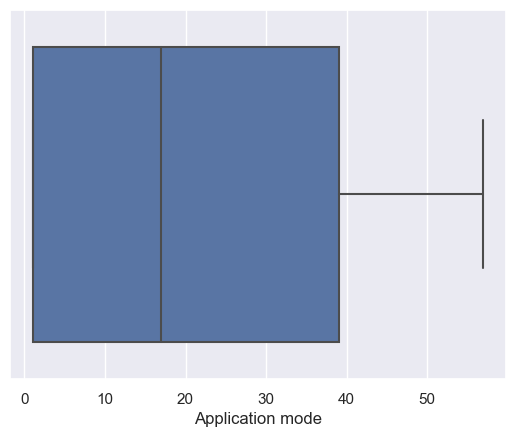

In [63]:
sns.boxplot(x=new_df_student["Application mode"])

<Axes: xlabel='Application order'>

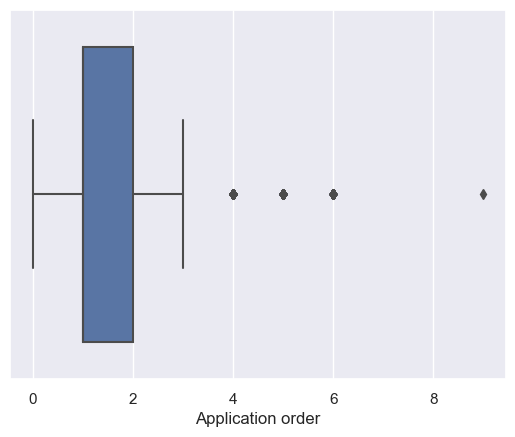

In [65]:
sns.boxplot(x=new_df_student["Application order"])

<Axes: xlabel='Daytime/evening attendance'>

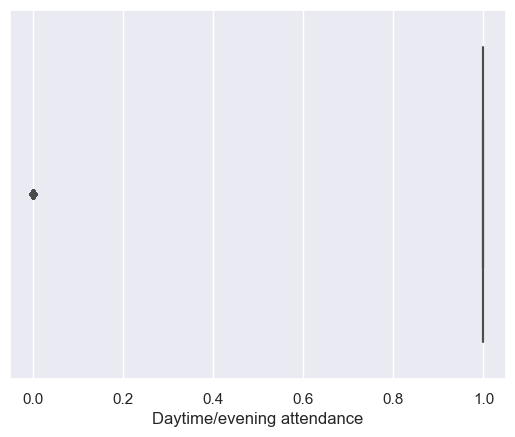

In [67]:
sns.boxplot(x=new_df_student["Daytime/evening attendance"]) 

<Axes: xlabel='Previous qualification'>

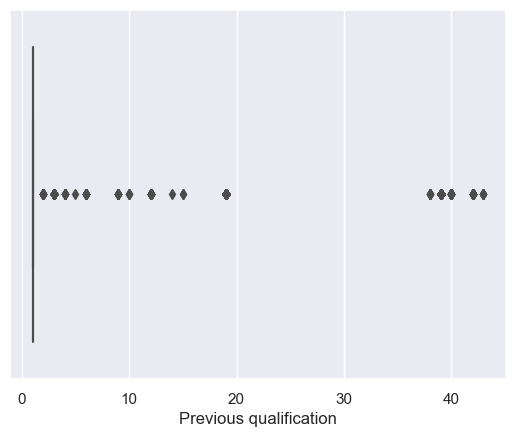

In [68]:
sns.boxplot(x=new_df_student["Previous qualification"]) 

<Axes: xlabel='Previous qualification (grade)'>

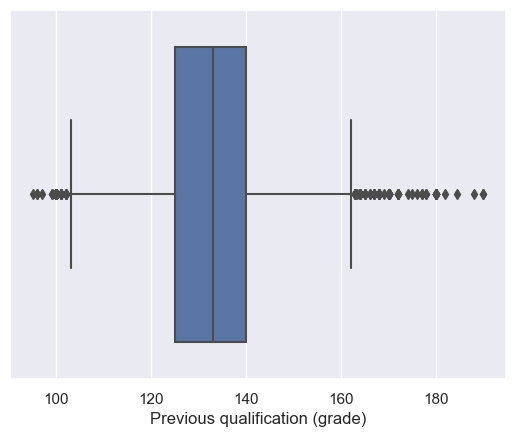

In [69]:
sns.boxplot(x=new_df_student["Previous qualification (grade)"]) 

<Axes: xlabel='Nacionality'>

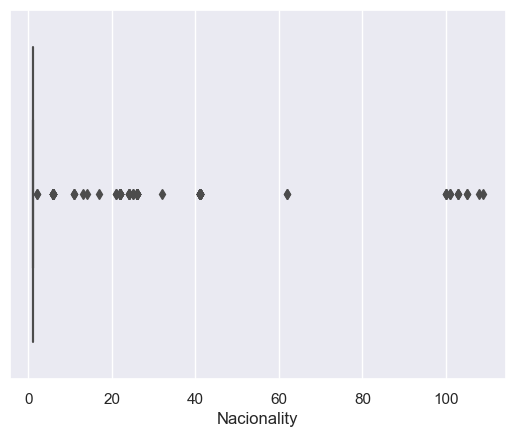

In [70]:
sns.boxplot(x=new_df_student["Nacionality"]) 

<Axes: xlabel="Mother's qualification">

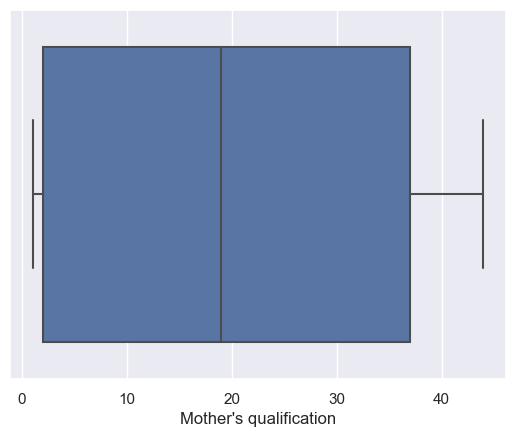

In [71]:
sns.boxplot(x=new_df_student["Mother's qualification"]) 

<Axes: xlabel="Mother's occupation">

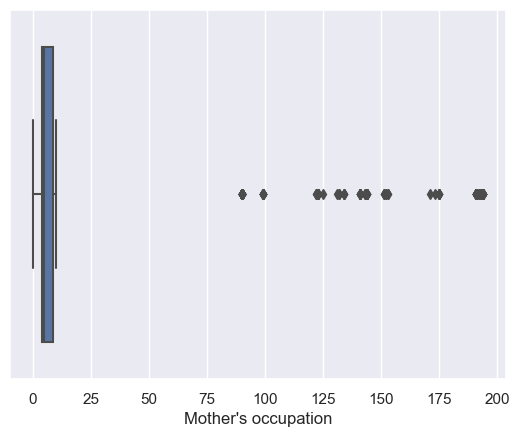

In [72]:
sns.boxplot(x=new_df_student["Mother's occupation"]) 

<Axes: xlabel="Father's occupation">

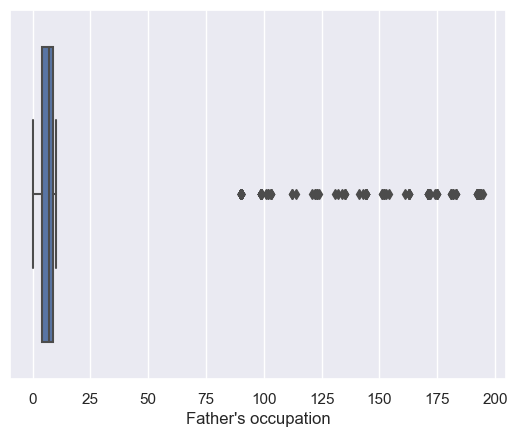

In [73]:
sns.boxplot(x=new_df_student["Father's occupation"]) 

<Axes: xlabel='Educational special needs'>

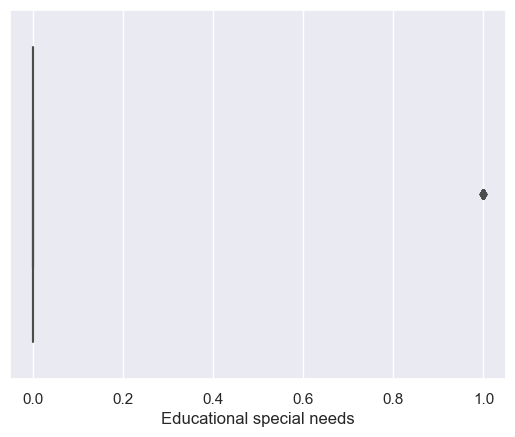

In [74]:
sns.boxplot(x=new_df_student["Educational special needs"]) 

<Axes: xlabel='Gender'>

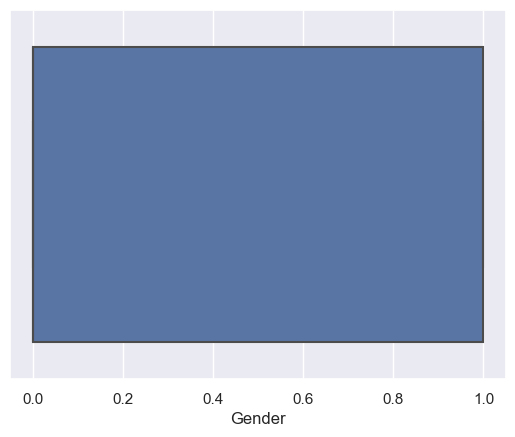

In [75]:
sns.boxplot(x=new_df_student["Gender"]) 

<Axes: xlabel='Scholarship holder'>

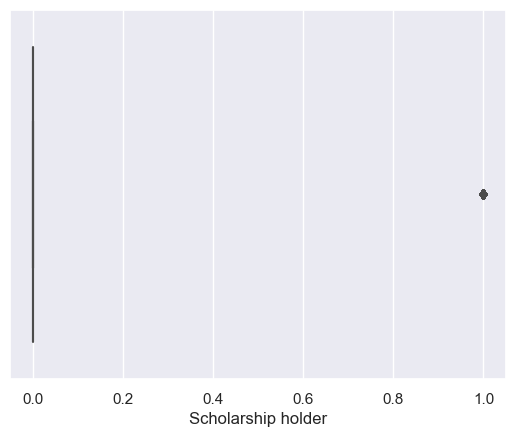

In [76]:
sns.boxplot(x=new_df_student["Scholarship holder"]) 

<Axes: xlabel='Curricular units 1st sem (enrolled)'>

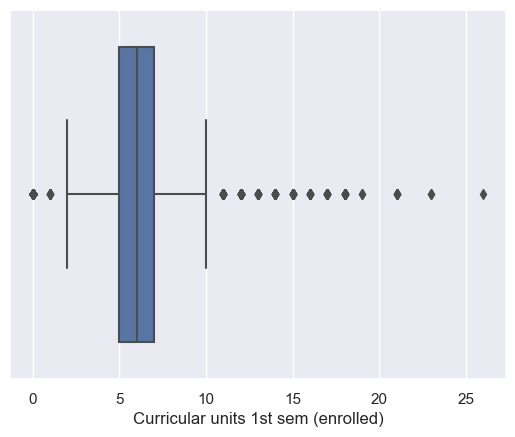

In [77]:
sns.boxplot(x=new_df_student["Curricular units 1st sem (enrolled)"]) 

<Axes: xlabel='Curricular units 1st sem (evaluations)'>

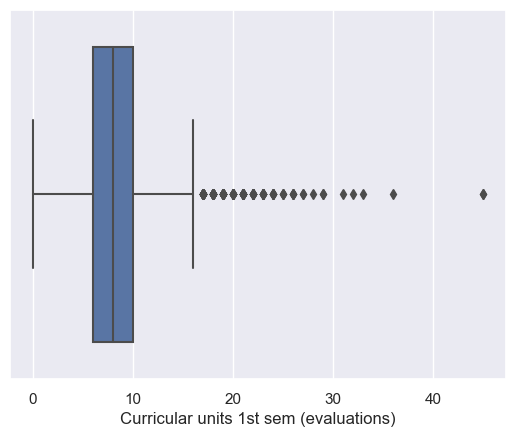

In [78]:
sns.boxplot(x=new_df_student["Curricular units 1st sem (evaluations)"]) 

<Axes: xlabel='Curricular units 1st sem (approved)'>

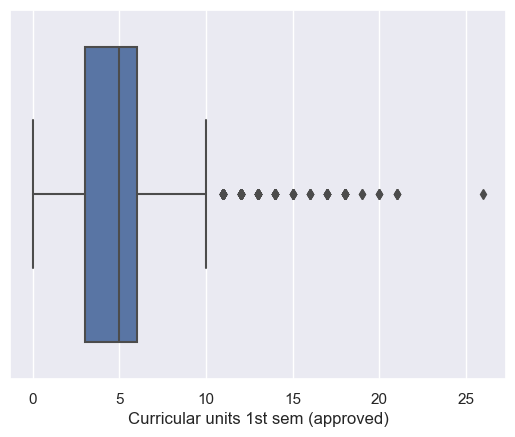

In [79]:
sns.boxplot(x=new_df_student["Curricular units 1st sem (approved)"])

<Axes: xlabel='Curricular units 1st sem (without evaluations)'>

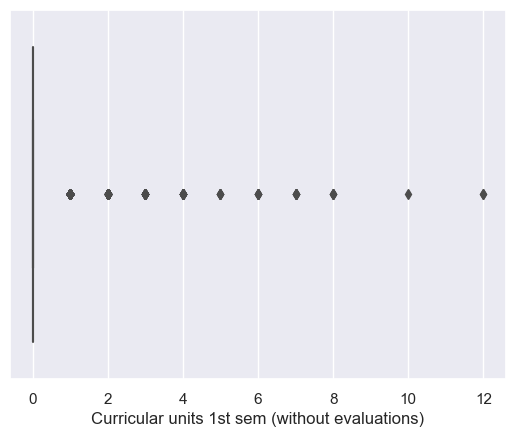

In [80]:
sns.boxplot(x=new_df_student["Curricular units 1st sem (without evaluations)"])

<Axes: xlabel='Curricular units 2nd sem (credited)'>

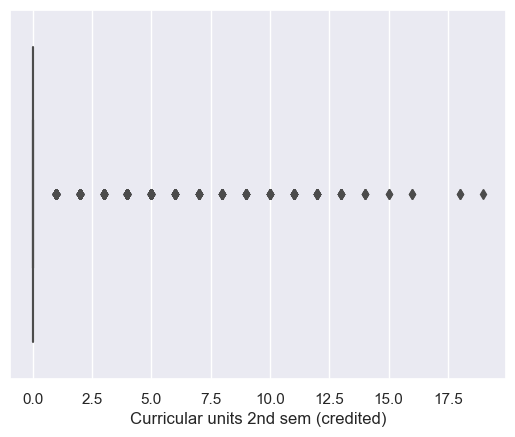

In [81]:
sns.boxplot(x=new_df_student["Curricular units 2nd sem (credited)"])

<Axes: xlabel='Curricular units 2nd sem (evaluations)'>

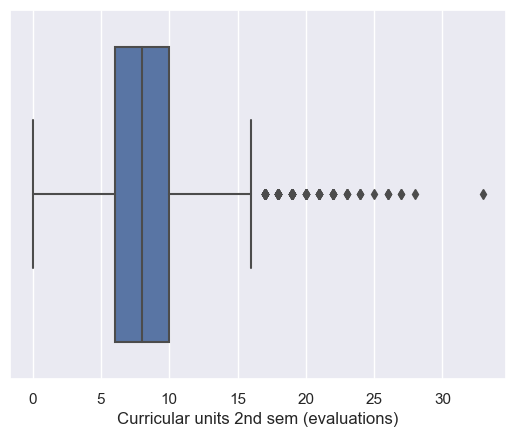

In [82]:
sns.boxplot(x=new_df_student["Curricular units 2nd sem (evaluations)"])

<Axes: xlabel='Curricular units 2nd sem (approved)'>

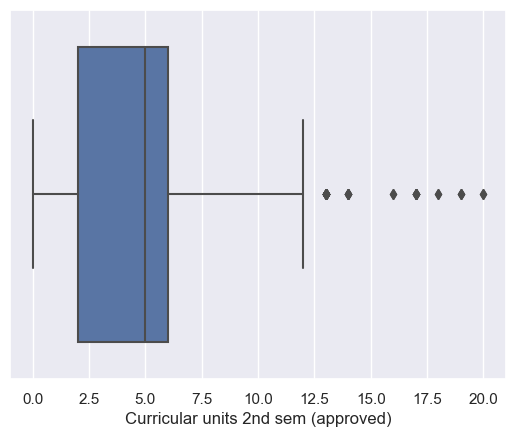

In [83]:
sns.boxplot(x=new_df_student["Curricular units 2nd sem (approved)"])

<Axes: xlabel='Curricular units 2nd sem (without evaluations)'>

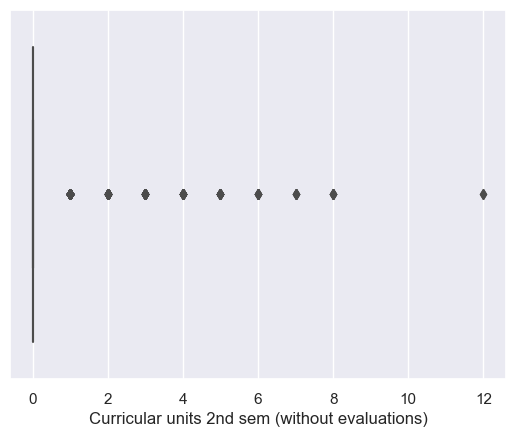

In [84]:
sns.boxplot(x=new_df_student["Curricular units 2nd sem (without evaluations)"])

<Axes: xlabel='Unemployment rate'>

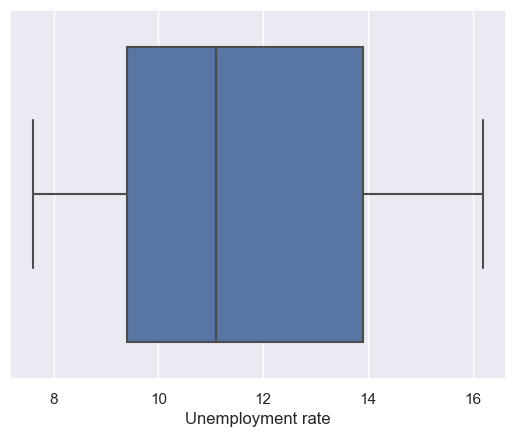

In [85]:
sns.boxplot(x=new_df_student["Unemployment rate"])

<Axes: xlabel='Inflation rate'>

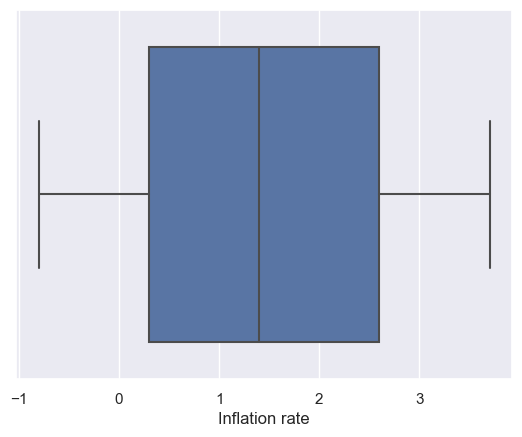

In [86]:
sns.boxplot(x=new_df_student["Inflation rate"])

<Axes: xlabel='GDP'>

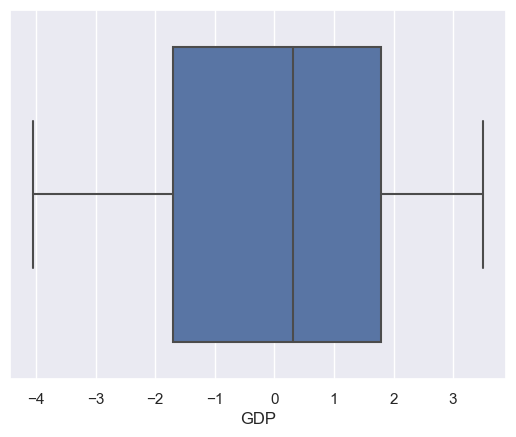

In [87]:
sns.boxplot(x=new_df_student["GDP"])



We can get some other graphs as well, for example below we can see the genders and how each gender is related to nationalities



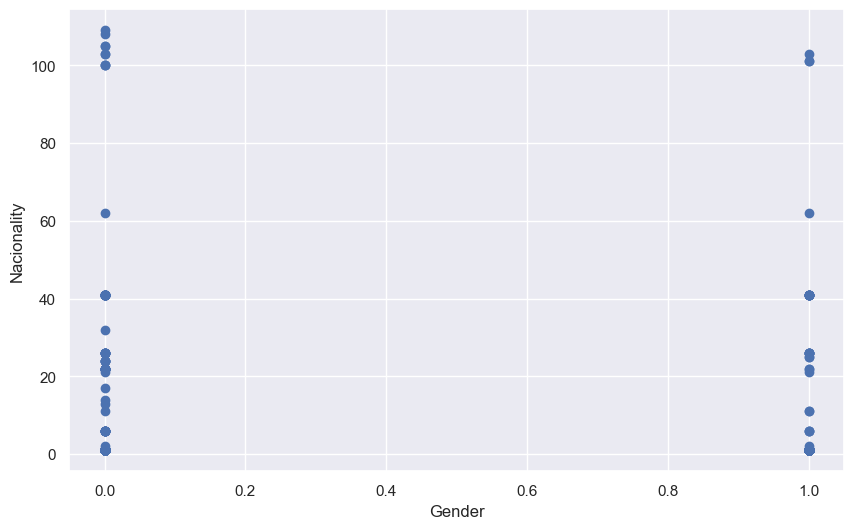

In [90]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(new_df_student["Gender"], new_df_student["Nacionality"])
ax.set_xlabel("Gender")
ax.set_ylabel("Nacionality")
plt.show()

In [18]:
new_df_student["Nacionality"].unique()


array([  1,  62,   6,  41,  26, 103,  13,  25,  21, 101,  11,  22,  32,
       100,  24, 109,   2, 108, 105,  14,  17], dtype=int64)

In [19]:
new_df_student["Mother's qualification"].unique()

array([19,  1, 37, 38,  3,  4, 42,  2, 34, 12, 40,  9,  5, 39, 11, 41, 30,
       14, 35, 36,  6, 10, 29, 43, 18, 22, 27, 26, 44], dtype=int64)

In [20]:
new_df_student["Mother's occupation"].unique()

array([  5,   3,   9,   7,   4,   1, 125,   0,   6,   2,  90,   8, 141,
       175,  99, 191, 151, 194, 192, 132, 152, 134,  10, 143, 123, 173,
       193, 122, 144, 131, 171, 153], dtype=int64)

In [21]:
new_df_student["Father's occupation"].unique()

array([  9,   3,   7,  10,   5,   8,   4,   1,   2, 124,   6,   0,  90,
       175, 121,  99, 144, 195, 192, 161, 193, 151, 182, 132, 131, 194,
       163, 135, 143, 171, 103, 172, 152, 183, 122, 102, 181, 134, 123,
       112, 153, 174, 141, 114, 101, 154], dtype=int64)

In [22]:
new_df_student["Educational special needs"].unique()

array([0, 1], dtype=int64)

In [23]:
new_df_student["Gender"].unique()

array([1, 0], dtype=int64)

In [24]:
new_df_student["Scholarship holder"].unique()

array([0, 1], dtype=int64)

In [25]:
new_df_student["Curricular units 1st sem (enrolled)"].unique()

array([ 0,  6,  5,  7,  8,  1, 12, 10, 18,  9, 21,  3, 17, 16, 11, 14, 13,
        2,  4, 15, 19, 23, 26], dtype=int64)

In [26]:
new_df_student["Curricular units 1st sem (evaluations)"].unique()

array([ 0,  6,  8,  9, 10,  5,  7, 14, 12, 15, 13, 11,  1, 17, 18, 19, 21,
        4, 16,  3, 24,  2, 22, 45, 20, 26, 29, 36, 32, 23, 27, 31, 28, 25,
       33], dtype=int64)

In [27]:
new_df_student["Curricular units 1st sem (approved)"].unique()

array([ 0,  6,  5,  7,  4,  1,  3,  2,  8, 18, 10,  9, 21, 11, 13, 12, 16,
       14, 17, 19, 15, 20, 26], dtype=int64)

In [28]:
new_df_student["Curricular units 1st sem (without evaluations)"].unique()

array([ 0,  1,  2,  4,  3,  6, 12, 10,  7,  5,  8], dtype=int64)

In [29]:
new_df_student["Curricular units 2nd sem (credited)"].unique()

array([ 0,  1,  2,  5,  7,  4, 10,  3, 13,  9,  6, 11, 12,  8, 14, 15, 16,
       18, 19], dtype=int64)

In [30]:
new_df_student["Curricular units 2nd sem (evaluations)"].unique()


array([ 0,  6, 10, 17,  8,  5,  7, 14,  9, 12, 11, 13, 19,  3, 15, 16,  4,
       18,  2, 21,  1, 26, 27, 22, 20, 24, 28, 23, 25, 33], dtype=int64)

In [31]:
new_df_student["Curricular units 2nd sem (approved)"].unique()

array([ 0,  6,  5,  8,  2,  7,  4,  1,  3, 10, 13, 11, 19,  9, 12, 17, 14,
       20, 16, 18], dtype=int64)

In [32]:
new_df_student["Curricular units 2nd sem (without evaluations)"].unique()

array([ 0,  5,  2,  1,  3,  6,  4, 12,  7,  8], dtype=int64)

In [33]:
new_df_student["Unemployment rate"].unique()

array([10.8, 13.9,  9.4, 16.2, 15.5,  8.9, 12.7, 11.1,  7.6, 12.4])

In [34]:
new_df_student["Inflation rate"].unique()

array([ 1.4, -0.3, -0.8,  0.3,  2.8,  3.7,  0.6,  2.6,  0.5])

In [35]:
new_df_student["GDP"].unique()

array([ 1.74,  0.79, -3.12, -0.92, -4.06,  3.51, -1.7 ,  2.02,  0.32,
        1.79])

In [36]:
new_df_student["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)



Before anything else, I need to split my data
we do not perform PCA on the dependant variable, we choose it beforehand
create dataset that has the dependant variables, not the independent


I want to extract the signal of my remaining columns and create cumulative variance graph
This is going to tell me the number of features that I need in a certain amount of signal



In [37]:
new_df_student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 24 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Application mode                                4424 non-null   int64  
 1   Application order                               4424 non-null   int64  
 2   Daytime/evening attendance                      4424 non-null   int64  
 3   Previous qualification                          4424 non-null   int64  
 4   Previous qualification (grade)                  4424 non-null   float64
 5   Nacionality                                     4424 non-null   int64  
 6   Mother's qualification                          4424 non-null   int64  
 7   Mother's occupation                             4424 non-null   int64  
 8   Father's occupation                             4424 non-null   int64  
 9   Educational special needs                

In [38]:
%matplotlib inline 
import numpy as np 
from sklearn.decomposition import PCA
import seaborn as sns; 
import matplotlib.pyplot as plt
sns.set() 


new_df_student["Target"].unique()


array(['Dropout', 'Graduate', 'Enrolled', 'Grad', 'graduate', 'Drop',
       'dropout'], dtype=object)

In [39]:
new_df_student["Target"]=new_df_student["Target"].replace({"Grad":"Graduate", "graduate":"Graduate", "Drop":"Dropout", "dropout":"Dropout"})

In [40]:
new_df_student["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [41]:
from numpy import asarray
from sklearn.preprocessing import OrdinalEncoder
# define data
data = asarray([['Dropout'], ['Graduate'], ['Enrolled']])
print(data)
# define ordinal encoding
encoder = OrdinalEncoder()
# transform data
result = encoder.fit_transform(data)
print(result)



[['Dropout']
 ['Graduate']
 ['Enrolled']]
[[0.]
 [2.]
 [1.]]


In [42]:
student_n_label = new_df_student.drop('Target', axis=1)


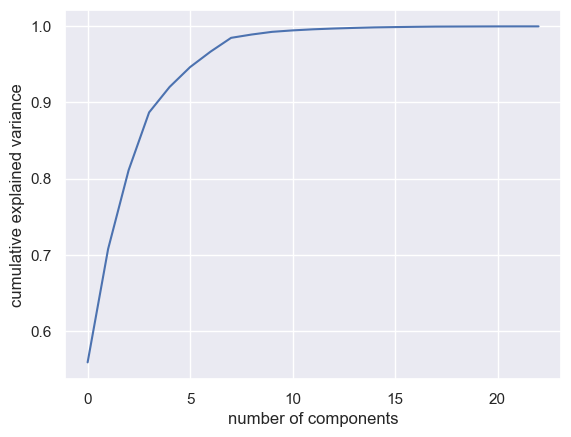

In [43]:
student_n_label = new_df_student.drop('Target', axis=1)
pca = PCA().fit(student_n_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 



I am retaining 99.5% variance so that means 7 number of components



In [44]:
pca = PCA(7)
projected = pca.fit_transform(student_n_label)

In [45]:
projected.shape

(4424, 7)

In [46]:
student_pca = pd.DataFrame(projected, columns =['C1', 'C2', 'C3', 'C4','C5','C6','C7'])

In [47]:
student_pca.head()

,C1,C2,C3,C4,C5,C6,C7
0,-5.719145,-3.020909,-2.805538,-10.626143,-1.450910,-2.963650,1.380224
1,-12.337190,-10.749566,20.522581,22.574830,-7.205947,-0.911112,-2.789838
2,-2.656710,-12.222600,-23.574599,-6.066253,4.516228,0.241725,1.568579
3,-9.184603,3.782976,-20.602290,-6.858502,-0.153080,1.223992,-0.400746
4,-1.354704,24.098604,-17.874583,-29.523612,-3.811650,-0.495265,0.585836


In [48]:
student_pca["Target"] = new_df_student["Target"]


In [49]:
student_pca.head(200)
student_pca["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)



#Converting the data into numbers and see if this will help



In [50]:
#student_pca["Target"]=student_pca["Target"].replace({"Graduate":0,"Dropout":1,"Enrolled":2})

In [51]:
student_array = student_pca.values

In [52]:
student_pca["Target"].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [53]:
from sklearn.model_selection import train_test_split
X = student_array[:,0:7]
y = student_array[:,7]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [54]:
student_pca.head()

,C1,C2,C3,C4,C5,C6,C7,Target
0,-5.719145,-3.020909,-2.805538,-10.626143,-1.450910,-2.963650,1.380224,Dropout
1,-12.337190,-10.749566,20.522581,22.574830,-7.205947,-0.911112,-2.789838,Graduate
2,-2.656710,-12.222600,-23.574599,-6.066253,4.516228,0.241725,1.568579,Dropout
3,-9.184603,3.782976,-20.602290,-6.858502,-0.153080,1.223992,-0.400746,Graduate
4,-1.354704,24.098604,-17.874583,-29.523612,-3.811650,-0.495265,0.585836,Graduate


In [55]:
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [56]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [57]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.541680 (0.020405)
LDA: 0.539135 (0.018242)
KNN: 0.495906 (0.017374)
CART: 0.481213 (0.019632)
NB: 0.487423 (0.019353)
SVM: 0.520770 (0.017438)


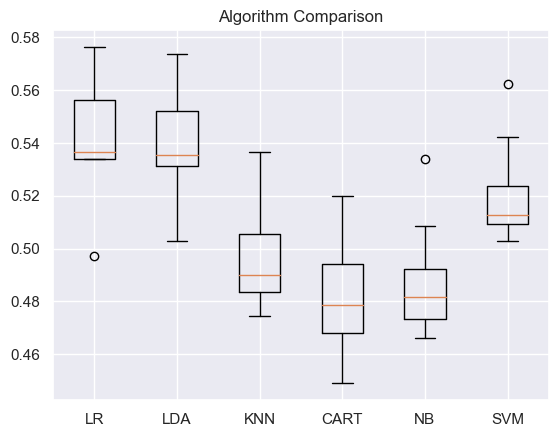

In [58]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [59]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [61]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.536723163841808
[[107   1 166]
 [ 40   3 124]
 [ 77   2 365]]




We used PCA and we reduce the signal into 7 new columns using the Target as the dependent variable





The Curse of Dimensionality refers to various problems that arise when working with multi-dimensional data. This is when the volume of the space increases exponentially, leading to a sparsity of data. This sparsity can cause various issues such as increased computational complexity and difficulty in visualization and interpretation of the data.





The conclusion is that in this case since we do not have much data that is invalid LR would be the best solution however the accuracy is not as good as expected 

